In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
allstate = pd.read_csv('./data/allstate_train.csv')
allstate.head() # 고객이 자동차 보험상품을 구매하기까지의 Transaction 기록
# 각 Customer ID별 quote history 포함, 마지막 행이 구매 포인트 (record_type = 1)

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [3]:
allstate.query('customer_ID == 10152724')

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
665243,10152724,1,0,3,13:42,KY,10204,1,1,1,...,1.0,4.0,0,0,3,3,0,0,2,642
665244,10152724,2,0,3,13:43,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665245,10152724,3,0,3,13:43,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665246,10152724,4,0,3,13:44,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,677
665247,10152724,5,0,3,13:46,KY,10204,1,1,1,...,1.0,4.0,1,0,2,3,0,2,2,685
665248,10152724,6,1,1,15:14,KY,10204,1,1,1,...,4.0,4.0,1,0,3,3,0,2,2,681


In [4]:
# 구매 포인트인 데이터 포인트만 처리
data = allstate.query('record_type == 1').copy()

# 분석의 편의를 위해 사용할 속성을 범주형과 연속형으로 구분
con = ['group_size','car_age','age_oldest','age_youngest','duration_previous','cost']
cat = ['day','homeowner','car_value','risk_factor','married_couple','C_previous','state','shopping_pt']
data = data[con+cat]
data.head()

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,shopping_pt
8,2,2,46,42,2.0,634,0,0,g,3.0,1,1.0,IN,9
14,1,10,28,28,13.0,731,3,0,e,4.0,0,3.0,NY,6
22,1,11,43,43,4.0,602,4,0,c,NaN,0,2.0,PA,8
26,2,3,62,60,3.0,626,4,1,d,3.0,1,3.0,WV,4
32,1,5,32,28,2.0,614,1,0,d,3.0,1,1.0,MO,6


### Handling Missing Values

In [5]:
data.isnull().sum()

group_size               0
car_age                  0
age_oldest               0
age_youngest             0
duration_previous      836
cost                     0
day                      0
homeowner                0
car_value              432
risk_factor          34346
married_couple           0
C_previous             836
state                 1019
shopping_pt              0
dtype: int64

In [6]:
data.shape

(97009, 14)

#### DROP

In [7]:
data_drop = data.dropna(subset=['state', 'car_value', 'risk_factor', 'C_previous', 'duration_previous'])
data_drop.shape

(61338, 14)

In [ ]:
# 결측값이 하나라도 포함되어 있는 feature를 자동으로 없애고 싶을 때
data.dropna(subset=data.isnull().sum()[data.isnull().sum().gt(0)].index.values)

In [8]:
data_drop.isnull().sum()

group_size           0
car_age              0
age_oldest           0
age_youngest         0
duration_previous    0
cost                 0
day                  0
homeowner            0
car_value            0
risk_factor          0
married_couple       0
C_previous           0
state                0
shopping_pt          0
dtype: int64

#### Impute

#### Continuous Feature 결측값 대체

In [9]:
data[con].isnull().sum()

group_size             0
car_age                0
age_oldest             0
age_youngest           0
duration_previous    836
cost                   0
dtype: int64

In [12]:
# Method 1 : Univarate Imputation
from sklearn.impute import SimpleImputer

imputer_con = SimpleImputer(strategy='median')
imputer_con.fit(data[con])

# strategy = 'mean' : 평균값 대체
# strategy = 'median' : 중앙값 대체
# strategy = 'most_frequent' : 최빈값 대체

SimpleImputer(strategy='median')

In [13]:
data['duration_previous'].median()

5.0

In [15]:
imputer_con.transform(data[con])

array([[  2.,   2.,  46.,  42.,   2., 634.],
       [  1.,  10.,  28.,  28.,  13., 731.],
       [  1.,  11.,  43.,  43.,   4., 602.],
       ...,
       [  1.,   8.,  23.,  23.,   5., 716.],
       [  1.,   0.,  39.,  39.,   7., 651.],
       [  1.,   1.,  20.,  20.,   4., 681.]])

In [16]:
data_imp = data.copy()
data_imp[con] = imputer_con.transform(data[con])

In [18]:
# 결측값이 중위값으로 변환됨
data_imp.loc[data[data['duration_previous'].isna()].index]['duration_previous']

377       5.0
450       5.0
1044      5.0
1828      5.0
2152      5.0
         ... 
661737    5.0
662523    5.0
662699    5.0
662853    5.0
665003    5.0
Name: duration_previous, Length: 836, dtype: float64

In [20]:
# Method 2 : Multivarate Imputation

from sklearn.experimental import enable_iterative_imputer # still experimental
from sklearn.impute import IterativeImputer

data_imp = data.copy()
data_imp[con] = IterativeImputer(max_iter=10, random_state=2022).fit_transform(data[con])

In [21]:
data_imp.loc[data[data['duration_previous'].isna()].index]['duration_previous']

377       4.742801
450       5.407067
1044      7.685823
1828      4.160533
2152      4.628841
            ...   
661737    6.011405
662523    4.300583
662699    5.674572
662853    7.360666
665003    6.489347
Name: duration_previous, Length: 836, dtype: float64

#### Categorical Feature 결측치 대체

In [22]:
# 최빈값
data_imp[cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             97009 non-null  int64  
 1   homeowner       97009 non-null  int64  
 2   car_value       96577 non-null  object 
 3   risk_factor     62663 non-null  float64
 4   married_couple  97009 non-null  int64  
 5   C_previous      96173 non-null  float64
 6   state           95990 non-null  object 
 7   shopping_pt     97009 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 8.7+ MB


In [23]:
data_imp[cat] = SimpleImputer(strategy='most_frequent').fit_transform(data_imp[cat])
data_imp[cat].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   day             97009 non-null  object
 1   homeowner       97009 non-null  object
 2   car_value       97009 non-null  object
 3   risk_factor     97009 non-null  object
 4   married_couple  97009 non-null  object
 5   C_previous      97009 non-null  object
 6   state           97009 non-null  object
 7   shopping_pt     97009 non-null  object
dtypes: object(8)
memory usage: 8.7+ MB


In [24]:
data[con]

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost
8,2,2,46,42,2.0,634
14,1,10,28,28,13.0,731
22,1,11,43,43,4.0,602
26,2,3,62,60,3.0,626
32,1,5,32,28,2.0,614
...,...,...,...,...,...,...
665225,2,1,75,75,15.0,628
665233,1,13,33,33,8.0,681
665239,1,8,23,23,5.0,716
665242,1,0,39,39,7.0,651


### Handling Categorical Variables

In [25]:
data_imp[cat].head()

,day,homeowner,car_value,risk_factor,married_couple,C_previous,state,shopping_pt
8,0,0,g,3.0,1,1.0,IN,9
14,3,0,e,4.0,0,3.0,NY,6
22,4,0,c,3.0,0,2.0,PA,8
26,4,1,d,3.0,1,3.0,WV,4
32,1,0,d,3.0,1,1.0,MO,6


In [26]:
# One-Hot Encoding
data_imp['car_value']
data_imp_ohe = data_imp.copy()
data_imp_ohe = pd.get_dummies(data_imp, columns=['car_value'])
data_imp_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97009 entries, 8 to 665248
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   group_size         97009 non-null  float64
 1   car_age            97009 non-null  float64
 2   age_oldest         97009 non-null  float64
 3   age_youngest       97009 non-null  float64
 4   duration_previous  97009 non-null  float64
 5   cost               97009 non-null  float64
 6   day                97009 non-null  object 
 7   homeowner          97009 non-null  object 
 8   risk_factor        97009 non-null  object 
 9   married_couple     97009 non-null  object 
 10  C_previous         97009 non-null  object 
 11  state              97009 non-null  object 
 12  shopping_pt        97009 non-null  object 
 13  car_value_a        97009 non-null  uint8  
 14  car_value_b        97009 non-null  uint8  
 15  car_value_c        97009 non-null  uint8  
 16  car_value_d        97

In [27]:
# 변수명에 'car'가 포함된 변수만 호출
data_imp_ohe.filter(like='car').head()

,car_age,car_value_a,car_value_b,car_value_c,car_value_d,car_value_e,car_value_f,car_value_g,car_value_h,car_value_i
8,2.0,0,0,0,0,0,0,1,0,0
14,10.0,0,0,0,0,1,0,0,0,0
22,11.0,0,0,1,0,0,0,0,0,0
26,3.0,0,0,0,1,0,0,0,0,0
32,5.0,0,0,0,1,0,0,0,0,0


In [28]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

data_imp_ohe['state'] = LabelEncoder().fit_transform(data_imp_ohe['state'])

In [31]:
data_imp_ohe.filter(like='state').head()

,state
8,10
14,23
22,27
26,34
32,15


### Feature Scaling

<font color='darkgreen'><p>
### *The effect of preprocessing on supervised learning* #####
<img align='left' src='http://drive.google.com/uc?export=view&id=1BLGzg0t4WqgBo8BjQMGTymW1cTisLTlU'> 

- Neural network와 SVM 같은 알고리즘은 feature의 scale에 매우 민감하기 때문에 모델링 전에 scale을 조정하는 전처리 작업이 필요 
- scikit-learn은 아래와 같은 다양한 scale 변환 방법을 제공
<img align='left' src='http://drive.google.com/uc?export=view&id=1dtzf-czC-Yt_PVKgsl7jOMSchS9XT7Id' style="max-width: 70%; height: auto;"/>

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=2022) 

In [33]:
from sklearn.svm import SVC

svm = SVC(random_state=2022)
svm.fit(X_train, y_train).score(X_test, y_test)

0.9020979020979021

In [34]:
# Standarization : Preprocessing Using Zero Mean and Unit Variance Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc_1 = scaler.fit_transform(X_train)
X_test_sc_1 = scaler.transform(X_test)
svm.fit(X_train_sc_1, y_train).score(X_test_sc_1, y_test)

0.965034965034965

In [36]:
# Min-Max Scaling : Preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_sc_2 = scaler.fit(X_train).transform(X_train)
X_test_sc_2 = scaler.transform(X_test)
svm.fit(X_train_sc_2, y_train).score(X_test_sc_2, y_test)

0.972027972027972

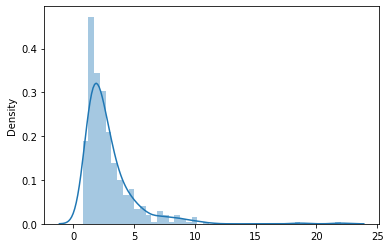

In [38]:
# Power Transform

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(pd.DataFrame(X_train[:,12]))
plt.show()

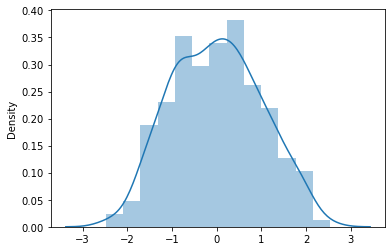

In [40]:
# making data more Gaussian-like

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(standardize=True)
X_train_sc_3 = scaler.fit_transform(X_train)

sns.distplot(pd.DataFrame(X_train_sc_3[:,12]))
plt.show()

In [41]:
X_test_sc_3 = scaler.transform(X_test)
svm.fit(X_train_sc_3, y_train).score(X_test_sc_3, y_test)

0.9790209790209791

### Feature Selection

In [42]:
# Model Based Feature Selection

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select_1 = SelectFromModel(RandomForestClassifier(random_state=2022), threshold=None)

In [43]:
X_train_sc_3_fs_1 = select_1.fit(X_train_sc_3, y_train).transform(X_train_sc_3)

print('X_train_sc_3.shape: {}, X_train_sc_3_sc_1.shape: {}'.format(X_train_sc_3.shape, X_train_sc_3_fs_1.shape))

X_train_sc_3.shape: (426, 30), X_train_sc_3_sc_1.shape: (426, 9)


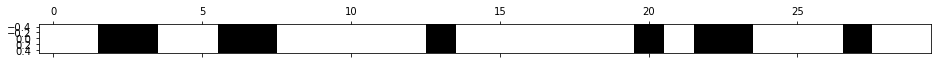

In [44]:
mask = select_1.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.show()

In [45]:
X_train.shape

(426, 30)

In [46]:
X_test_sc_3_fs_1 = select_1.transform(X_test_sc_3)
svm.fit(X_train_sc_3_fs_1, y_train).score(X_test_sc_3_fs_1, y_test)

0.965034965034965

In [47]:
# Univarate Feature Selection
from sklearn.feature_selection import SelectKBest

select_2 = SelectKBest(k=10)
X_train_sc_3_fs_2 = select_2.fit_transform(X_train_sc_3, y_train)
X_train_sc_3_fs_2.shape

(426, 10)

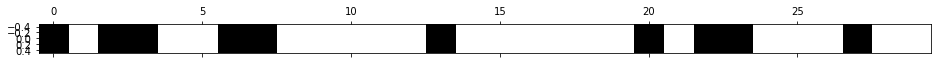

In [48]:
mask = select_2.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.show()

In [49]:
X_test_sc_3_fs_2 = select_2.transform(X_test_sc_3)
svm.fit(X_train_sc_3_fs_2, y_train).score(X_test_sc_3_fs_2, y_test)

0.965034965034965

In [51]:
# Recursive feature Elimination
from sklearn.feature_selection import RFE

select_3 = RFE(estimator=RandomForestClassifier(random_state=2022), n_features_to_select=10, step=1)
X_train_sc_3_fs_3 = select_3.fit_transform(X_train_sc_3, y_train)
X_train_sc_3_fs_3.shape

(426, 10)

In [54]:
X_test_sc_3_fs_3 = select_3.transform(X_test_sc_3)
svm.fit(X_train_sc_3_fs_3, y_train).score(X_test_sc_3_fs_3, y_test)

0.965034965034965

### Feature Generation
- 그룹별 Summary : Ex) State는 고객이 위치한 36개 주를 나타냄 - 주별로 평균 Cost를 계산해 새로운 Feature 생성
- 기존 Feature 간 결합 : Ex) 1인당 견적을 계산
- 개별 Feature의 함수적 변환 : Ex) np.log, np.sqrt, np.squre 등을 사용
- 상호작용과 다항식 추가

### Automatic generating polynomial and interaction features
입력값  x 를 다항식으로 변환한다.
$$ x →[1,x,x^2,x^3,⋯] $$

만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.
$$ [x_1,x_2]→[1,x_1,x_2,x_1^2,x_1x_2,x_2^2] $$

다음과 같은 파라미터를 가진다.
- degree : 차수
- interaction_only: interaction 항 생성 여부
- include_bias : 상수항 생성 여부

In [55]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(1, 7).reshape(3, 2); X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [56]:
poly = PolynomialFeatures(3)
poly.fit_transform(X)

array([[  1.,   1.,   2.,   1.,   2.,   4.,   1.,   2.,   4.,   8.],
       [  1.,   3.,   4.,   9.,  12.,  16.,  27.,  36.,  48.,  64.],
       [  1.,   5.,   6.,  25.,  30.,  36., 125., 150., 180., 216.]])

In [57]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3']

In [58]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.],
       [ 1.,  5.,  6., 30.]])

In [59]:
poly.get_feature_names()

['1', 'x0', 'x1', 'x0 x1']

In [60]:
print(X_train_sc_2.shape)

poly = PolynomialFeatures(2, include_bias=False)
X_train_sc_3_poly = poly.fit_transform(X_train_sc_3)
X_test_sc_3_poly = poly.transform(X_test_sc_3)
print(X_train_sc_3_poly.shape, X_test_sc_3_poly.shape)

svm.fit(X_train_sc_3_poly, y_train).score(X_test_sc_3_poly, y_test)

(426, 30)
(426, 495) (143, 495)


0.951048951048951

#### Feature Generation + Feature Selection

In [61]:
select_2 = SelectKBest(k=20)
X_train_sc_3_poly_fs_2 = select_2.fit(X_train_sc_3_poly, y_train).transform(X_train_sc_3_poly)
X_test_sc_3_poly_fs_2 = select_2.transform(X_test_sc_3_poly)
print(X_train_sc_3_poly_fs_2.shape)

svm.fit(X_train_sc_3_poly_fs_2, y_train).score(X_test_sc_3_poly_fs_2, y_test)

(426, 20)


0.958041958041958

In [62]:
mask = select_2.get_support()
np.array(poly.get_feature_names())[mask]

array(['x0', 'x1', 'x2', 'x3', 'x5', 'x6', 'x7', 'x10', 'x12', 'x13',
       'x16', 'x17', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27'], dtype='<U7')

## Ex-curriculum Methods Of Feature Engineering

In [3]:
movie = pd.read_csv('./data/movie.csv')
movie.head() #영화 평점 관련 데이터

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie.info() #결측치 확인에 유용 
# 4916개의 entries 와 28개의 열을 확인해서 모자란 부분이 결측치임을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

In [5]:
movie.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [6]:
movie.shape

(4916, 28)

In [7]:
movie.dropna().shape 
#너무 많은 데이터가 제거됨, fillna 이후 dropna 진행

(3655, 28)

In [8]:
movie.color.value_counts() #범주형 데이터이므로 value_counts를 먼저 진행
#대부분 color 데이터이므로 결측치를 color로 대체

Color              4693
Black and White     204
Name: color, dtype: int64

In [10]:
col = {'color':'Color',
      'director_name':'UNK',
      'duration':0} 
#color 열을 Color로 대체, director_name은 범주가 너무 많으므로 모르는 것 자체로 대체
#특정 값으로 대체를 원할 경우, 이처럼 dictionary 형태로 만든 뒤, fillna를 진행하면 됨

movie = movie.fillna(col)
movie.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews        49
duration                       0
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

In [13]:
movie = movie.fillna(movie.median())
# movie의 모든 수치형 변수는 중앙값으로 대체

In [14]:
movie = movie.dropna() #최후 결측치 제거

In [15]:
#이상치 확인은 결측치 확인이 끝난 뒤 진행
movie.describe() #현재 열이 많아서 확인하기 힘듦
movie.describe().T
movie.describe().T.iloc[:,3:] #min,max,4분위 값들만 확인 가능

,min,25%,50%,75%,max
num_critic_for_reviews,1.00,60.00,118.00,199.00,8.130000e+02
duration,0.00,94.00,104.00,118.00,3.340000e+02
director_facebook_likes,0.00,9.00,52.00,209.00,2.300000e+04
actor_3_facebook_likes,0.00,157.75,391.00,648.00,2.300000e+04
actor_1_facebook_likes,0.00,656.00,1000.00,11000.00,6.400000e+05
gross,162.00,8040422.25,25043962.00,55191053.00,7.605058e+08
num_voted_users,6.00,12072.50,39535.00,102955.25,1.689764e+06
cast_total_facebook_likes,0.00,1581.00,3299.50,14546.00,6.567300e+05
facenumber_in_poster,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,1.00,80.75,171.00,341.25,5.060000e+03


In [16]:
#duration 상 max 값이 너무 크고, min이 0인 것 또한 이상치로 확인가능
movie.duration.describe()

count    4528.000000
mean      107.944125
std        23.835007
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       334.000000
Name: duration, dtype: float64

In [17]:
movie.duration.clip(lower=60, upper=180).describe() #lower나 upper 중 한 쪽만 사용 가능

count    4528.000000
mean      107.757288
std        20.632511
min        60.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       180.000000
Name: duration, dtype: float64

In [18]:
c = movie.duration<=180
movie.duration.where(c, 181).describe() #조건을 넣어줘서, 조건에 맞지 않은 특정값을 변환

count    4528.000000
mean      107.483878
std        21.545534
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       181.000000
Name: duration, dtype: float64

#### 파생변수

In [19]:
mem_data = pd.read_csv('./data/mem_data.csv') # 고객의 profile 데이터
mem_tr = pd.read_csv('./data/mem_transaction.csv') # 고객 구매 데이터

In [20]:
f = mem_tr.groupby('MEM_ID')['SELL_AMT'].agg('mean').reset_index()#고객별 평균 구매액
f.columns = ['MEM_ID','평균구매액']
f

,MEM_ID,평균구매액
0,957,2500.000000
1,1054,38120.000000
2,1067,7700.000000
3,1068,8255.555556
4,1078,5900.000000
...,...,...
10759,2007042901468,3300.000000
10760,2007061900497,7700.000000
10761,2007062900420,5700.000000
10762,2007090300653,32033.333333


In [21]:
mem_data = mem_data.merge(f, how='left') # 만들어낸 파생변수를 합쳐줌, how=left를 통해 좌측 데이터 프레임 기준 병합
mem_data = mem_data.fillna(0) # 결측치를 0으로 대체
mem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10764 entries, 0 to 10763
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEM_ID       10764 non-null  int64  
 1   M_STORE_ID   10764 non-null  int64  
 2   GENDER       10764 non-null  object 
 3   BIRTH_DT     10764 non-null  object 
 4   BIRTH_SL     10764 non-null  object 
 5   ZIP_CD       10764 non-null  object 
 6   RGST_DT      10764 non-null  object 
 7   VISIT_CNT    10764 non-null  float64
 8   SALES_AMT    10764 non-null  float64
 9   LAST_VST_DT  10764 non-null  object 
 10  USABLE_PNT   10764 non-null  float64
 11  USED_PNT     10764 non-null  float64
 12  ACC_PNT      10764 non-null  float64
 13  USABLE_INIT  10764 non-null  float64
 14  SMS          10764 non-null  object 
 15  평균구매액        10764 non-null  float64
dtypes: float64(7), int64(2), object(7)
memory usage: 1.4+ MB


In [22]:
# 요일별 구매 패턴
mem_tr.MEMP_DT = pd.to_datetime(mem_tr.MEMP_DT) #시계열 데이터 변환
mem_tr.info() # datetime으로 변한 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60049 entries, 0 to 60048
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STORE_ID  60049 non-null  int64         
 1   SELL_DT   60049 non-null  int64         
 2   MEMP_STY  60049 non-null  object        
 3   MEM_ID    60049 non-null  int64         
 4   MEMP_DT   60049 non-null  datetime64[ns]
 5   SELL_AMT  60049 non-null  int64         
 6   MEMP_TP   60049 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.2+ MB


In [23]:
mem_tr.MEMP_DT.dt.dayofweek #요일 추출

0        0
1        4
2        2
3        0
4        1
        ..
60044    2
60045    6
60046    4
60047    5
60048    2
Name: MEMP_DT, Length: 60049, dtype: int64

In [24]:
mem_tr['weekend'] = mem_tr.MEMP_DT.dt.dayofweek >4 #주말여부

In [27]:
f = mem_tr.groupby(['MEM_ID','weekend'])['SELL_AMT'].agg('count')
f = f.unstack().fillna(0).astype('int').reset_index()
# reset_index 보다 가장 마지막 인덱스를 열 이름으로 사용하여 True, False로 구분 
# 결측치를 0으로 바꾸고 type을 횟수이므로 int로 변환
# 마지막에 reset_index()
f.columns = ['MEM_ID','주중구매횟수','주말구매횟수']
f

,MEM_ID,주중구매횟수,주말구매횟수
0,957,3,0
1,1054,5,0
2,1067,0,1
3,1068,8,1
4,1078,3,2
...,...,...,...
10759,2007042901468,0,1
10760,2007061900497,1,0
10761,2007062900420,2,0
10762,2007090300653,3,0


In [28]:
mem_data = mem_data.merge(f, how='left')
mem_data = mem_data.fillna(0)
mem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10764 entries, 0 to 10763
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEM_ID       10764 non-null  int64  
 1   M_STORE_ID   10764 non-null  int64  
 2   GENDER       10764 non-null  object 
 3   BIRTH_DT     10764 non-null  object 
 4   BIRTH_SL     10764 non-null  object 
 5   ZIP_CD       10764 non-null  object 
 6   RGST_DT      10764 non-null  object 
 7   VISIT_CNT    10764 non-null  float64
 8   SALES_AMT    10764 non-null  float64
 9   LAST_VST_DT  10764 non-null  object 
 10  USABLE_PNT   10764 non-null  float64
 11  USED_PNT     10764 non-null  float64
 12  ACC_PNT      10764 non-null  float64
 13  USABLE_INIT  10764 non-null  float64
 14  SMS          10764 non-null  object 
 15  평균구매액        10764 non-null  float64
 16  주중구매횟수       10764 non-null  int32  
 17  주말구매횟수       10764 non-null  int32  
dtypes: float64(7), int32(2), int64(2), object(7)
m